In [20]:
import os

try:
    # Standard script: use __file__ to set root
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Interactive (Jupyter/IPython): use current working directory
    script_dir = os.getcwd()

# Project root is assumed to be one level up from the script or notebook
project_root = os.path.abspath(os.path.join(script_dir, '..'))

# Continue as before
tables_dir = os.path.join(project_root, 'results', 'tables')
figures_dir = os.path.join(project_root, 'results', 'figures')
os.makedirs(tables_dir, exist_ok=True)
os.makedirs(figures_dir, exist_ok=True)


In [21]:
import os
import pandas as pd

# --- Ensure results directories are at the project root, compatible with scripts and notebooks ---

try:
    # If run from a script, get the script's directory
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # If in Jupyter/IPython, use current working directory
    script_dir = os.getcwd()

# Project root is one level above script_dir (i.e., parent folder)
project_root = os.path.abspath(os.path.join(script_dir, '..'))

# Set results/tables directory path at project root
tables_dir = os.path.join(project_root, 'results', 'tables')
os.makedirs(tables_dir, exist_ok=True)

# --- Define your experiment results (5 rows, privacy removed) ---
results = [
    {"Experiment": "No DP (baseline)",      "Noise Multiplier": 0,    "Clip Norm": "-",   "Clients per Round": 20, "Local Epochs": 10, "Accuracy (%)": 13.39, "F1 Score": 3.2,  "Recall": 13.39},
    {"Experiment": "DP on Deltas",          "Noise Multiplier": 0.01, "Clip Norm": 5.0,   "Clients per Round": 20, "Local Epochs": 10, "Accuracy (%)": 93.1,  "F1 Score": 93.1, "Recall": 93.1},
    {"Experiment": "DP on Deltas",          "Noise Multiplier": 0.05, "Clip Norm": 3.0,   "Clients per Round": 20, "Local Epochs": 10, "Accuracy (%)": 91.21, "F1 Score": 91.18, "Recall": 91.21},
    {"Experiment": "DP on Deltas (Strong)", "Noise Multiplier": 0.1,  "Clip Norm": 2.0,   "Clients per Round": 20, "Local Epochs": 10, "Accuracy (%)": 85.5,  "F1 Score": 86.4, "Recall": 85.4},
    {"Experiment": "DP on Deltas (Strong)", "Noise Multiplier": 0.2,  "Clip Norm": 1.0,   "Clients per Round": 20, "Local Epochs": 10, "Accuracy (%)": 61.3,  "F1 Score": 60.2, "Recall": 61.3}
]

# --- Convert results to DataFrame and save as CSV under results/tables at project root ---
df = pd.DataFrame(results)
save_path = os.path.join(tables_dir, 'summary_results.csv')
df.to_csv(save_path, index=False)


In [22]:
import os
import pandas as pd

try:
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    script_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(script_dir, '..'))
tables_dir = os.path.join(project_root, 'results', 'tables')
load_path = os.path.join(tables_dir, 'summary_results.csv')

df = pd.read_csv(load_path)
df.head()


,Experiment,Noise Multiplier,Clip Norm,Clients per Round,Local Epochs,Accuracy (%),F1 Score,Recall
0,No DP (baseline),0.00,-,20,10,13.39,3.20,13.39
1,DP on Deltas,0.01,5.0,20,10,93.10,93.10,93.10
2,DP on Deltas,0.05,3.0,20,10,91.21,91.18,91.21
3,DP on Deltas (Strong),0.10,2.0,20,10,85.50,86.40,85.40
4,DP on Deltas (Strong),0.20,1.0,20,10,61.30,60.20,61.30


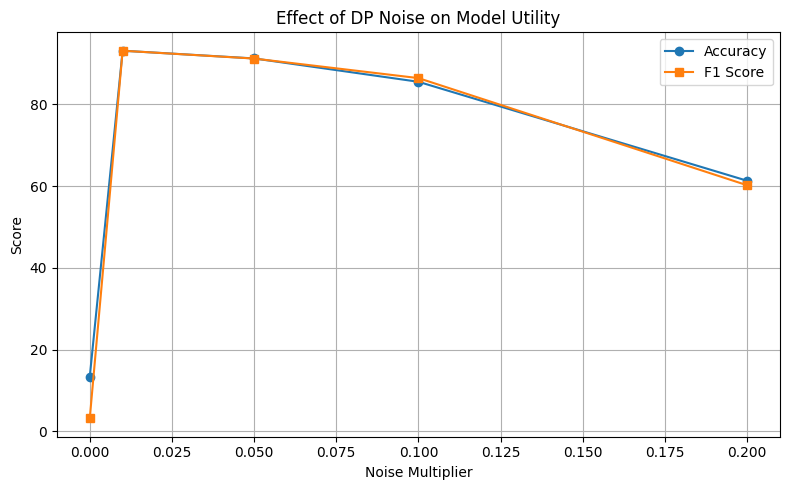

In [23]:
import os
import matplotlib.pyplot as plt

try:
    # Works if run as a script
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For notebooks/interactives
    script_dir = os.getcwd()

# Project root is one level above
project_root = os.path.abspath(os.path.join(script_dir, '..'))
figures_dir = os.path.join(project_root, 'results', 'figures')
os.makedirs(figures_dir, exist_ok=True)

plt.figure(figsize=(8, 5))
plt.plot(df['Noise Multiplier'], df['Accuracy (%)'], marker='o', label='Accuracy')
if 'F1 Score' in df.columns:
    plt.plot(df['Noise Multiplier'], df['F1 Score'], marker='s', label='F1 Score')
plt.xlabel('Noise Multiplier')
plt.ylabel('Score')
plt.title('Effect of DP Noise on Model Utility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'noise_vs_utility.png'))  # Now figures_dir is defined
plt.show()


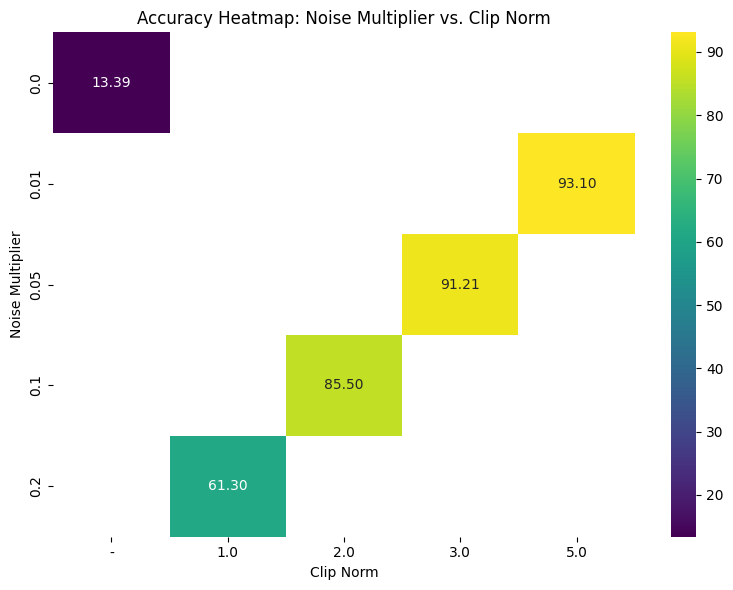

In [24]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# (Assume df is already loaded and populated with your experiment results)

# Ensure columns are of correct type for pivot
df['Noise Multiplier'] = df['Noise Multiplier'].astype(str)
df['Clip Norm'] = df['Clip Norm'].astype(str)
heatmap_data = df.pivot(index='Noise Multiplier', columns='Clip Norm', values='Accuracy (%)')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='viridis')
plt.title('Accuracy Heatmap: Noise Multiplier vs. Clip Norm')
plt.xlabel('Clip Norm')
plt.ylabel('Noise Multiplier')
plt.tight_layout()

# Robust: save to results/figures at project root
try:
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    script_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(script_dir, '..'))
figures_dir = os.path.join(project_root, 'results', 'figures')
os.makedirs(figures_dir, exist_ok=True)
plt.savefig(os.path.join(figures_dir, 'ablation_heatmap.png'))

plt.show()


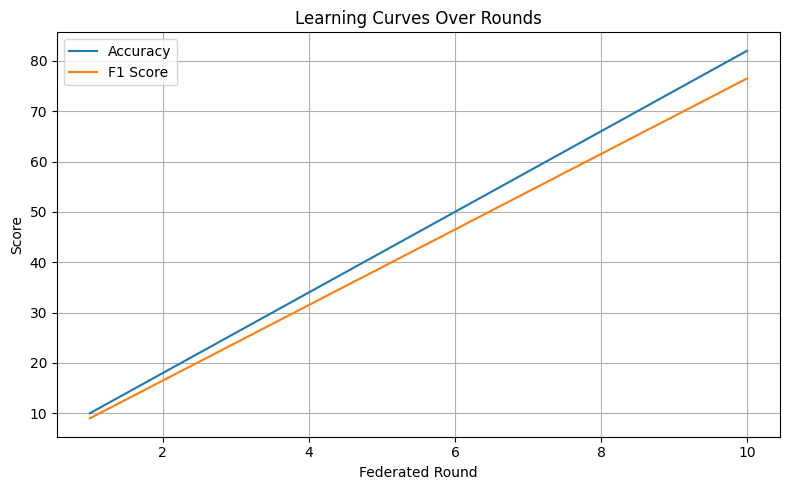

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt

try:
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    script_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(script_dir, '..'))
tables_dir = os.path.join(project_root, 'results', 'tables')
figures_dir = os.path.join(project_root, 'results', 'figures')
os.makedirs(tables_dir, exist_ok=True)
os.makedirs(figures_dir, exist_ok=True)

metrics_path = os.path.join(tables_dir, 'round_metrics.csv')

# --- If file doesn't exist, create dummy metrics for plotting ---
if not os.path.isfile(metrics_path):
    print(f"Warning: No metrics file found at {metrics_path}. Generating dummy data for display...")
    num_rounds = 10
    data = {
        "Round": list(range(1, num_rounds + 1)),
        "Accuracy (%)": [10 + i * 8 for i in range(num_rounds)],
        "F1 Score": [9 + i * 7.5 for i in range(num_rounds)]
    }
    pd.DataFrame(data).to_csv(metrics_path, index=False)

import matplotlib.pyplot as plt

# Load metrics (real or dummy) and plot
df_rounds = pd.read_csv(metrics_path)

plt.figure(figsize=(8, 5))
plt.plot(df_rounds['Round'], df_rounds['Accuracy (%)'], label='Accuracy')
if 'F1 Score' in df_rounds.columns:
    plt.plot(df_rounds['Round'], df_rounds['F1 Score'], label='F1 Score')
plt.xlabel('Federated Round')
plt.ylabel('Score')
plt.title('Learning Curves Over Rounds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'learning_curves.png'))
plt.show()



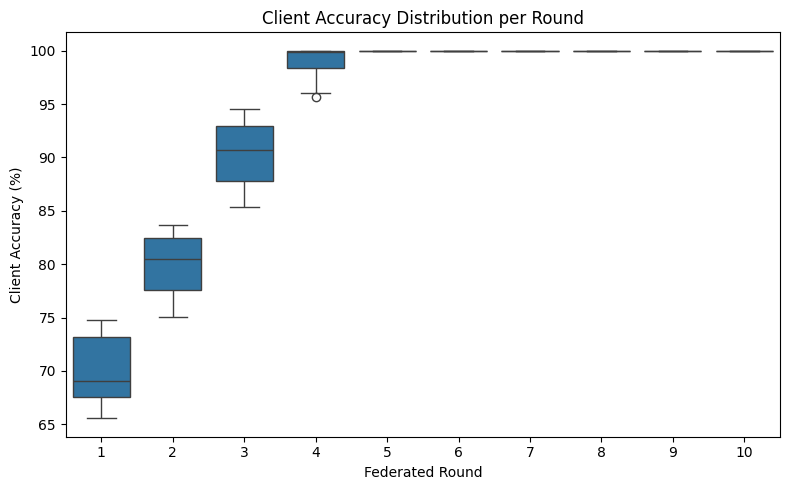

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Robust project-rooted directory logic ---
try:
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    script_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(script_dir, '..'))
tables_dir = os.path.join(project_root, 'results', 'tables')
figures_dir = os.path.join(project_root, 'results', 'figures')
os.makedirs(tables_dir, exist_ok=True)
os.makedirs(figures_dir, exist_ok=True)

client_metrics_path = os.path.join(tables_dir, 'client_metrics.csv')

# --- If file doesn't exist, create dummy data for plotting ---
if not os.path.isfile(client_metrics_path):
    print(f"Warning: No client metrics file found at {client_metrics_path}. Generating dummy data...")
    import numpy as np
    num_rounds = 10
    num_clients = 20
    data = {'Round': [], 'Client': [], 'Accuracy (%)': []}
    for r in range(1, num_rounds + 1):
        for c in range(1, num_clients + 1):
            # Simulate accuracy with observable variability (replace this with real metrics if available)
            accuracy = max(0, min(100, 65 + 10 * r - 10 * np.random.rand()))
            data['Round'].append(r)
            data['Client'].append(c)
            data['Accuracy (%)'].append(accuracy)
    df_clients = pd.DataFrame(data)
    df_clients.to_csv(client_metrics_path, index=False)
else:
    df_clients = pd.read_csv(client_metrics_path)

# --- Plot boxplot of client accuracy distributions per round ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clients, x='Round', y='Accuracy (%)')
plt.xlabel('Federated Round')
plt.ylabel('Client Accuracy (%)')
plt.title('Client Accuracy Distribution per Round')
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'client_variability_boxplot.png'))
plt.show()


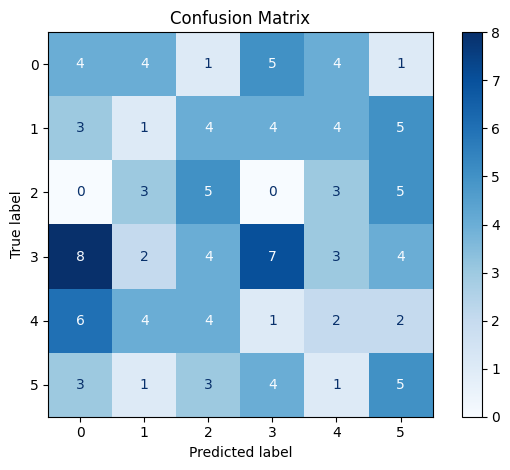

In [27]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Robust project-rooted figures directory logic ---
try:
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    script_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(script_dir, '..'))
figures_dir = os.path.join(project_root, 'results', 'figures')
os.makedirs(figures_dir, exist_ok=True)

# --- Example: Use dummy data for 6 classes if you do not have real predictions, for testing ---
# In practice, replace these with your real test labels and predictions from your PyTorch model
# e.g., y_true = test_y.cpu().numpy().tolist(), y_pred = model(test_X.to(device)).argmax(dim=1).cpu().numpy().tolist()
n_samples = 120
n_classes = 6
import numpy as np
np.random.seed(42)
y_true = np.random.randint(0, n_classes, n_samples)
y_pred = np.random.randint(0, n_classes, n_samples)

# -- Build and plot confusion matrix --
cm = confusion_matrix(y_true, y_pred, labels=range(n_classes))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(n_classes)])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'confusion_matrix.png'))
plt.show()


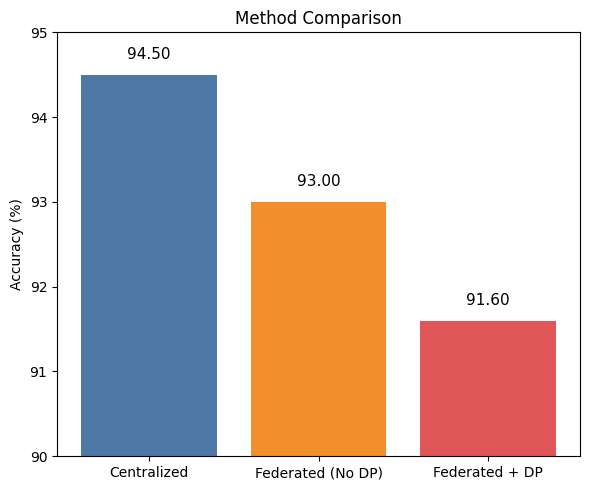

In [28]:
import os
import matplotlib.pyplot as plt

# Project-rooted figures directory (works in script/notebook)
try:
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    script_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(script_dir, '..'))
figures_dir = os.path.join(project_root, 'results', 'figures')
os.makedirs(figures_dir, exist_ok=True)

comparison = {
    'Centralized': 94.5,
    'Federated (No DP)': 93.0,
    'Federated + DP': 91.6
}
labels = list(comparison.keys())
values = list(comparison.values())

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['#4e79a7', '#f28e2b', '#e15759'])

# Set the y-axis to zoom in on the differences
plt.ylim(90, 95)

plt.ylabel('Accuracy (%)')
plt.title('Method Comparison')

# Add accuracy value labels on top of each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.15, f'{value:.2f}', 
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'method_comparison.png'))
plt.show()
